# Atividade Integradora
## Programa Avançado de Data Science e Decisão - Insper


   ### Computação para Ciência de Dados 
   ### Modelos Preditivos

---
### Integrantes:

   <h5> Chau Kuo Hue </h5>
   <h5> Morene Valente </h5>
   <h5> João Pedro Cervone </h5>

Atividade: Exploração dos dados e análise dos resultados da Pesquisa de Satisfação realizada pela Anatel das Operadoras de Telefonia Móvel (Plano Pré) nos anos de 2015 a 2019 no Brasil.



### 1.  Importação Base: Pesquisa Anatel

1.1 Importação Bibliotecas

1.2 Instação Pacotes

1.3 Importar arquivo

In [1]:
from pandas import Series, DataFrame
from pandas.api.types import is_numeric_dtype
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
pd.set_option("display.max_rows", 100) 
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [3]:
cols_to_read = ['IDTNS','ANO_BASE','ESTADO',"OPERADORA","Q6","Q7","Q8","Q9","J1", 
                "B1_1","B1_2","C1_1","C1_2","D2_1","D2_2","D2_3","A3","A4","A5",
                "H2a"]
df = pd.read_csv("trab1.csv", usecols=cols_to_read)

### 2.  Ajuste nos Dados

Após a importação dos dados, filtramos as informações relevantes para a realização das nossas análises e renomeamos as colunas para facilitar a identificação da viriável que estamos usando.

In [4]:
dic_cols = {'Q6':'nat_pessoa','Q7':'tipo_conta','Q8':'idade','Q9':'sexo','J1':'sat_geral', 'B1_1':'facil_entend',
            'B1_2':'comp_public','C1_1':'fazer_ligac','C1_2':'qual_ligac','D2_1':'acessar_dados',
            'D2_2':'mant_conex','D2_3':'veloc_naveg', 'A3':'qual_atend_tel','A4':'qual_atend_site',
            'A5':'qual_atend_loja','H2a':'renda'}
df.rename(columns=dic_cols, inplace=True)

In [5]:
df['sexo'] = df['sexo'].map({1:'FEMININO', 2:'MASCULINO'})
df['ANO_BASE'] = df['ANO_BASE'].astype(str)

In [6]:
# Substituindo o código 99 por NaN
numeric_out = ["IDTNS"]
numeric_cols = []
for col in df.columns:
    if is_numeric_dtype(df[col]) and col not in numeric_out:
        df.loc[(df[col]>10), col] = np.nan       
        numeric_cols.append(col)

### 3.  Importação Base Extra: Regiões

Importamos uma tabela externa com a informação das regiões para vincular as nossas análises.

In [7]:
regioes = pd.read_csv("Lista-de-Municípios-com-IBGE-Brasil.csv" , delimiter = ";")
regioes

,IBGE,Estado,UF,Região,Qtd Mun
0,11,Rondônia,RO,Região Norte,52
1,12,Acre,AC,Região Norte,22
2,13,Amazonas,AM,Região Norte,62
3,14,Roraima,RR,Região Norte,15
4,15,Pará,PA,Região Norte,144
5,16,Amapá,AP,Região Norte,16
6,17,Tocantins,TO,Região Norte,139
7,21,Maranhão,MA,Região Nordeste,217
8,22,Piauí,PI,Região Nordeste,224
9,23,Ceará,CE,Região Nordeste,184


In [8]:
df['ESTADO'].unique()

array(['RN', 'SE', 'GO', 'TO', 'MT', 'BA', 'RR', 'SP', 'MS', 'AM', 'AL',
       'SC', 'RJ', 'MG', 'ES', 'AC', 'MA', 'PB', 'PR', 'RS', 'PI', 'AP',
       'PA', 'PE', 'RO', 'DF', 'CE'], dtype=object)

In [9]:
df = df.merge(regioes[["UF","Região"]], left_on="ESTADO", right_on= "UF")
df.head()

,IDTNS,OPERADORA,ESTADO,ANO_BASE,nat_pessoa,tipo_conta,idade,sexo,sat_geral,facil_entend,comp_public,fazer_ligac,qual_ligac,acessar_dados,mant_conex,veloc_naveg,qual_atend_tel,qual_atend_site,qual_atend_loja,renda,UF,Região
0,576,OI,RN,2019,1.0,1.0,NaN,FEMININO,0.0,10.0,7.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,RN,Região Nordeste
1,971,CLARO,RN,2019,1.0,1.0,NaN,FEMININO,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,1.0,RN,Região Nordeste
2,3640,CLARO,RN,2019,1.0,1.0,NaN,MASCULINO,7.0,4.0,6.0,7.0,8.0,5.0,5.0,4.0,6.0,3.0,NaN,2.0,RN,Região Nordeste
3,5316,OI,RN,2019,1.0,1.0,NaN,FEMININO,5.0,4.0,4.0,10.0,10.0,2.0,3.0,5.0,7.0,5.0,NaN,1.0,RN,Região Nordeste
4,32534,VIVO,RN,2019,1.0,1.0,NaN,FEMININO,10.0,10.0,9.0,10.0,9.0,NaN,NaN,NaN,8.0,NaN,NaN,2.0,RN,Região Nordeste


[Fonte Tabela
](http://blog.mds.gov.br/redesuas/lista-de-municipios-brasileiros/)

### 4.  Análise Exploratória

Demonstração do dataframe com as variáveis utilizadas.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148016 entries, 0 to 148015
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDTNS            148016 non-null  int64  
 1   OPERADORA        148016 non-null  object 
 2   ESTADO           148016 non-null  object 
 3   ANO_BASE         148016 non-null  object 
 4   nat_pessoa       148016 non-null  float64
 5   tipo_conta       148016 non-null  float64
 6   idade            0 non-null       float64
 7   sexo             148016 non-null  object 
 8   sat_geral        147783 non-null  float64
 9   facil_entend     146983 non-null  float64
 10  comp_public      146705 non-null  float64
 11  fazer_ligac      147820 non-null  float64
 12  qual_ligac       147773 non-null  float64
 13  acessar_dados    81841 non-null   float64
 14  mant_conex       81809 non-null   float64
 15  veloc_naveg      81720 non-null   float64
 16  qual_atend_tel   90057 non-null   floa

In [11]:
df.head()

,IDTNS,OPERADORA,ESTADO,ANO_BASE,nat_pessoa,tipo_conta,idade,sexo,sat_geral,facil_entend,comp_public,fazer_ligac,qual_ligac,acessar_dados,mant_conex,veloc_naveg,qual_atend_tel,qual_atend_site,qual_atend_loja,renda,UF,Região
0,576,OI,RN,2019,1.0,1.0,NaN,FEMININO,0.0,10.0,7.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,RN,Região Nordeste
1,971,CLARO,RN,2019,1.0,1.0,NaN,FEMININO,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,1.0,RN,Região Nordeste
2,3640,CLARO,RN,2019,1.0,1.0,NaN,MASCULINO,7.0,4.0,6.0,7.0,8.0,5.0,5.0,4.0,6.0,3.0,NaN,2.0,RN,Região Nordeste
3,5316,OI,RN,2019,1.0,1.0,NaN,FEMININO,5.0,4.0,4.0,10.0,10.0,2.0,3.0,5.0,7.0,5.0,NaN,1.0,RN,Região Nordeste
4,32534,VIVO,RN,2019,1.0,1.0,NaN,FEMININO,10.0,10.0,9.0,10.0,9.0,NaN,NaN,NaN,8.0,NaN,NaN,2.0,RN,Região Nordeste


### 5.  Análise Perfil do Público

Iniciamos o trabalho da integradora a partir da análise do público que participou da pesquisa nos 5 anos de respostas disponíveis na base.

O primeiro gráfico apresenta a quantidade de participantes por genêro, nesta primeira visualização dos dados fica evidente que o número de partipantes reduziu ao longo dos anos, no entanto ainda ocorre equidade entre genêros.

In [12]:
publico = df[['IDTNS','ANO_BASE', 'ESTADO', 'Região', 'OPERADORA', 'idade', 'sexo', 'sat_geral', 'renda']]

In [13]:
publico[0:5]

,IDTNS,ANO_BASE,ESTADO,Região,OPERADORA,idade,sexo,sat_geral,renda
0,576,2019,RN,Região Nordeste,OI,NaN,FEMININO,0.0,NaN
1,971,2019,RN,Região Nordeste,CLARO,NaN,FEMININO,10.0,1.0
2,3640,2019,RN,Região Nordeste,CLARO,NaN,MASCULINO,7.0,2.0
3,5316,2019,RN,Região Nordeste,OI,NaN,FEMININO,5.0,1.0
4,32534,2019,RN,Região Nordeste,VIVO,NaN,FEMININO,10.0,2.0


In [14]:
perfil = publico.pivot_table(values='IDTNS', index="ANO_BASE", columns='sexo', aggfunc='count')
perfil.index.name = None
perfil.columns.name = None
perfil

,FEMININO,MASCULINO
2015,22648,21322
2016,14859,14943
2017,14839,15827
2018,11968,12005
2019,10380,9225


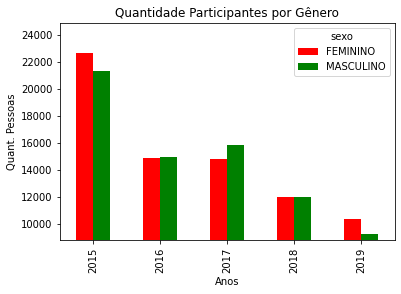

In [15]:
perfil = publico.groupby(['ANO_BASE', "sexo"]).size().unstack()
g1 = perfil.plot.bar(color={"red", "green"})
plt.xlabel('Anos')
plt.ylabel('Quant. Pessoas')
plt.title('Quantidade Participantes por Gênero')
plt.savefig('qtdegenero.png')
plt.rcParams['figure.figsize'] = (11,7)
plt.ylim(perfil.min().min()* 0.95, perfil.max().max() * 1.10 )
plt.show();

A pesquisa envolveu os 27 estados no país e os participantes avaliaram os serviços de 7 operadoras, no gráfico abaixo apresentamos o número de participantes por operadora. As principais: Claro, Vivo, Tim e Oi contam como uma quantidade relavante de clientes que responderam a pesquisa ao longo dos anos. Dado que confirmamos com a pesquisa de Market Share do Pré Pago das Operadoras no país, as quatro detem quase 99% do mercado de telefonia móvel no Brasil.

Informação consultada no site: https://www.teleco.com.br/prepago_uf.asp

In [16]:
clientes = publico.pivot_table(values='IDTNS', index="ANO_BASE", columns='OPERADORA', aggfunc='count', fill_value=0)
clientes.index.name = None
clientes.columns.name = None
clientes

,ALGAR,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO
2015,1062,10668,0,10498,346,10740,10656
2016,915,7264,0,6999,313,6965,7346
2017,939,7413,0,7245,316,7199,7554
2018,514,5690,430,6087,168,5431,5653
2019,492,4461,0,5078,113,4565,4896


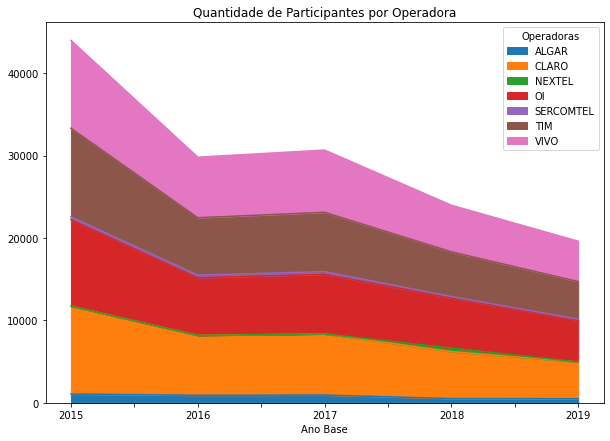

In [17]:
fig, ax = plt.subplots(1, figsize=(10,7))
clientes.plot(ax=ax,kind='area',rot=0, legend=True)
ax.legend(title="Operadoras")
plt.xlabel('Ano Base')
plt.title('Quantidade de Participantes por Operadora')
plt.show();

Importamos a tabela de classificação das regiões do IBGE para vincularmos aos dados da anatel e verificarmos a proporção de participantes por região do país. O gráfico apresenta um elevado número de partipante nas regiões Norte e Nordeste, na pesquisa da Teleco confirmamos que os estados dessas regiões tem um grande volume de usuários de planos pré pagos quando comparados com as demais regiões do país.

Informação consultada no site: https://www.teleco.com.br/prepago_uf.asp

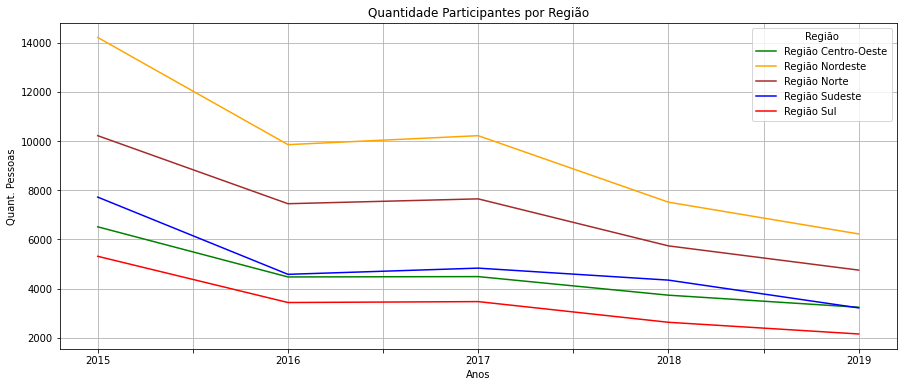

In [53]:
g_regiao = publico.groupby([('ANO_BASE'), ('Região')]).size().unstack()
g3 = g_regiao.plot(color={"blue", "red", "green", "orange", "brown"}, grid= True)
plt.xlabel('Anos')
plt.ylabel('Quant. Pessoas')
plt.title('Quantidade Participantes por Região')
plt.savefig('qtregiao.png')
plt.rcParams['figure.figsize'] = (15,6)

Na tabela abaixo apresentamos a quantidade de participantes por operadora, separados por ano e região do país:

In [19]:
regiao = publico.groupby(['ANO_BASE', 'Região', 'OPERADORA']).size().unstack()
regiao

OPERADORA                     ALGAR   CLARO  NEXTEL      OI  SERCOMTEL  \
ANO_BASE Região                                                          
2015     Região Centro-Oeste  346.0  1576.0     NaN  1514.0        NaN   
         Região Nordeste        NaN  3608.0     NaN  3566.0        NaN   
         Região Norte           NaN  2508.0     NaN  2526.0        NaN   
         Região Sudeste       716.0  1750.0     NaN  1692.0        NaN   
         Região Sul             NaN  1226.0     NaN  1200.0      346.0   
2016     Região Centro-Oeste  353.0  1003.0     NaN  1020.0        NaN   
         Região Nordeste        NaN  2468.0     NaN  2309.0        NaN   
         Região Norte           NaN  1967.0     NaN  1834.0        NaN   
         Região Sudeste       562.0  1004.0     NaN  1067.0        NaN   
         Região Sul             NaN   822.0     NaN   769.0      313.0   
2017     Região Centro-Oeste  346.0  1020.0     NaN  1046.0        NaN   
         Região Nordeste        NaN  2549.0     NaN  2376.0        NaN   
         Região Norte           NaN  1972.0     NaN  1982.0        NaN   
         Região Sudeste       593.0  1101.0     NaN  1073.0        NaN   
         Região Sul             NaN   771.0     NaN   768.0      316.0   
2018     Região Centro-Oeste  160.0   967.0     NaN   891.0        NaN   
         Região Nordeste        NaN  1909.0     NaN  2147.0        NaN   
         Região Norte           NaN  1307.0     NaN  1438.0        NaN   
         Região Sudeste       354.0   914.0   430.0   925.0        NaN   
         Região Sul             NaN   593.0     NaN   686.0      168.0   
2019     Região Centro-Oeste  164.0   750.0     NaN   721.0        NaN   
         Região Nordeste        NaN  1396.0     NaN  1924.0        NaN   
         Região Norte           NaN  1113.0     NaN  1102.0        NaN   
         Região Sudeste       328.0   733.0     NaN   778.0        NaN   
         Região Sul             NaN   469.0     NaN   553.0      113.0   

OPERADORA                        TIM    VIVO  
ANO_BASE Região                               
2015     Região Centro-Oeste  1502.0  1575.0  
         Região Nordeste      3651.0  3381.0  
         Região Norte         2542.0  2640.0  
         Região Sudeste       1750.0  1812.0  
         Região Sul           1295.0  1248.0  
2016     Região Centro-Oeste  1047.0  1054.0  
         Região Nordeste      2385.0  2690.0  
         Região Norte         1833.0  1818.0  
         Região Sudeste        973.0   977.0  
         Região Sul            727.0   807.0  
2017     Região Centro-Oeste  1025.0  1054.0  
         Região Nordeste      2499.0  2792.0  
         Região Norte         1846.0  1849.0  
         Região Sudeste       1045.0  1023.0  
         Região Sul            784.0   836.0  
2018     Região Centro-Oeste   840.0   878.0  
         Região Nordeste      1801.0  1658.0  
         Região Norte         1373.0  1621.0  
         Região Sudeste        800.0   925.0  
         Região Sul            617.0   571.0  
2019     Região Centro-Oeste   754.0   857.0  
         Região Nordeste      1511.0  1393.0  
         Região Norte         1096.0  1444.0  
         Região Sudeste        657.0   724.0  
         Região Sul            547.0   478.0

A Nota Geral de Satisfação dos clientes com as operadoras nos critérios avaliados nos 5 anos coletados na Pesquisa, demonstra um bom resultado dos serviços prestados, a média dos últimos 3 anos é 8, o que é considerado "Satisfeito" pela classificação da Anatel.

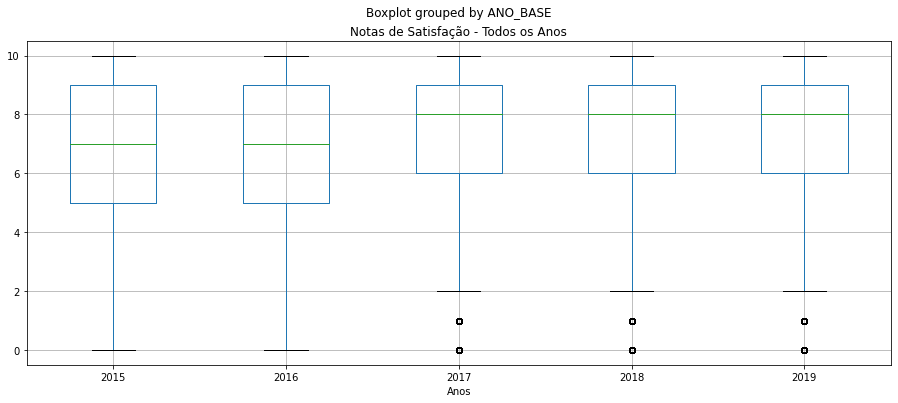

In [52]:
media = publico[['ANO_BASE', 'sat_geral']] 
media.boxplot(by=['ANO_BASE'], showfliers=True)
plt.title('Notas de Satisfação - Todos os Anos')
plt.xlabel('Anos')
plt.savefig('notas-boxplot.png')

### 6. Estatística das Variáveis Numéricas

Para complementar nossa análise em relação aos indicadores e variáveis que compõem a base, realizamos um texte estatístico para verificar se existe algum indicadores que sobressae aos demais durante a coleta dos dados.

A base foi segmentada em natureza de pessoa física e o tipo de plano somente pré-pagos, com isso, pode ser observado desvio padrão = 0 nas duas colunas.

Também é possível consultar a nota média em cada critério avaliado na pesquisa.

In [21]:
pd.options.display.float_format = '{:.2f}'.format

In [22]:
df[numeric_cols].describe()

,nat_pessoa,tipo_conta,idade,sat_geral,facil_entend,comp_public,fazer_ligac,qual_ligac,acessar_dados,mant_conex,veloc_naveg,qual_atend_tel,qual_atend_site,qual_atend_loja,renda
count,148016.00,148016.00,0.00,147783.00,146983.00,146705.00,147820.00,147773.00,81841.00,81809.00,81720.00,90057.00,32406.00,22310.00,118888.00
mean,1.00,1.00,nan,7.07,7.09,6.87,7.83,7.35,6.53,6.37,6.40,7.00,7.22,7.79,1.71
std,0.00,0.00,nan,2.50,2.69,2.85,2.51,2.69,2.91,2.91,2.92,2.96,2.73,2.67,0.98
min,1.00,1.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,1.00,1.00,nan,5.00,5.00,5.00,7.00,6.00,5.00,5.00,5.00,5.00,6.00,7.00,1.00
50%,1.00,1.00,nan,8.00,8.00,8.00,8.00,8.00,7.00,7.00,7.00,8.00,8.00,9.00,1.00
75%,1.00,1.00,nan,9.00,9.00,9.00,10.00,10.00,9.00,9.00,9.00,10.00,10.00,10.00,2.00
max,1.00,1.00,nan,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,5.00


In [23]:
df.ANO_BASE.value_counts()

2015    43970
2017    30666
2016    29802
2018    23973
2019    19605
Name: ANO_BASE, dtype: int64

### 7. Matriz de correlação

A matriz de correlação mostra os valores de correlação de Pearson, que medem o grau de relação linear entre as variáveis numéricas utilizadas.

In [24]:
num_cols = [col for col in numeric_cols if col not in ['nat_pessoa','tipo_conta']]
df[num_cols].corr()

,idade,sat_geral,facil_entend,comp_public,fazer_ligac,qual_ligac,acessar_dados,mant_conex,veloc_naveg,qual_atend_tel,qual_atend_site,qual_atend_loja,renda
idade,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sat_geral,nan,1.00,0.65,0.68,0.57,0.52,0.59,0.58,0.57,0.56,0.55,0.47,-0.10
facil_entend,nan,0.65,1.00,0.69,0.49,0.46,0.52,0.52,0.51,0.56,0.55,0.48,-0.09
comp_public,nan,0.68,0.69,1.00,0.50,0.48,0.56,0.56,0.55,0.57,0.56,0.47,-0.07
fazer_ligac,nan,0.57,0.49,0.50,1.00,0.69,0.50,0.49,0.47,0.47,0.46,0.41,-0.10
qual_ligac,nan,0.52,0.46,0.48,0.69,1.00,0.48,0.48,0.46,0.45,0.44,0.38,-0.06
acessar_dados,nan,0.59,0.52,0.56,0.50,0.48,1.00,0.80,0.79,0.50,0.62,0.44,-0.11
mant_conex,nan,0.58,0.52,0.56,0.49,0.48,0.80,1.00,0.79,0.50,0.61,0.43,-0.10
veloc_naveg,nan,0.57,0.51,0.55,0.47,0.46,0.79,0.79,1.00,0.49,0.62,0.42,-0.10
qual_atend_tel,nan,0.56,0.56,0.57,0.47,0.45,0.50,0.50,0.49,1.00,0.64,0.56,-0.11


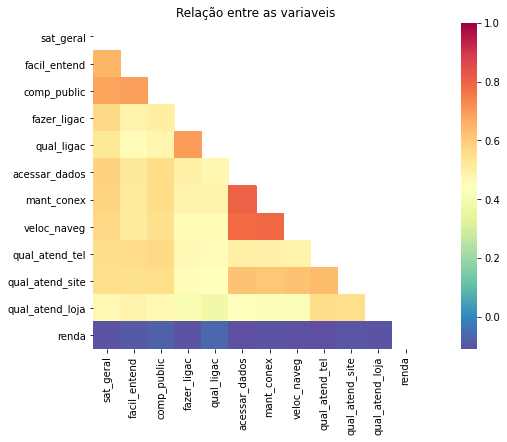

In [25]:
num_cols = [col for col in numeric_cols if col not in ['nat_pessoa','tipo_conta','idade']]
corrs = df[num_cols].corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.11, vmax=1)
plt.title('Relação entre as variaveis');

### 8. Histograma

Para analisar a frequência das respostas de 0 a 10 da pesquisa de satisfação, elaboramos este histograma, o que é possível confirmar que a maioria dos participantes avaliou os serviços pretados com notas acima ou iguais a 8.

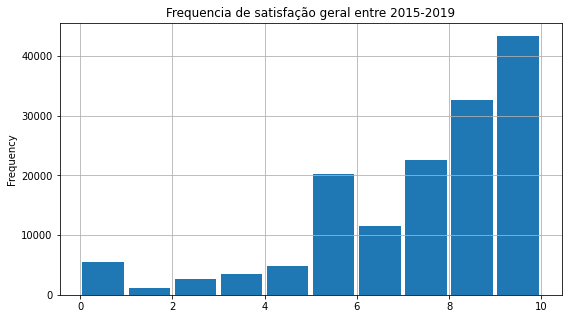

In [26]:
plt.figure(figsize=(9,5))
plt.title("Frequencia de satisfação geral entre 2015-2019")
df['sat_geral'].plot(kind='hist', bins=10,grid = True ,rwidth=0.9);

Esse grafico nos mostra o numero de notas entre 0 a 10 obtidas no periodo entre 2015 e 2019. 

### 9. Quantidade de Entrevistados e Análise do Nível de Satisfação

Neste tópico iremos explocar a quantidade de entrevistas, apresentando tabelas e análises com as relações que idenficamos e que agregaram na construção deste trabalho. Nosso foco foi avaliar a evolução das reclamações, tanto em quantidade de entrevistas como as notas finais, ao longo dos anos, identificando os estados e operadoras com melhora em suas áreas de atuação. Não focamos no tipo de reclamação.

A tabela abaixo apresenta o número de participantes na pesquisa por operadora nos anos de 2015 a 2019.

In [27]:
pt = df.pivot_table(values='IDTNS', index='OPERADORA', columns='ANO_BASE', aggfunc='all', fill_value=0)
pt.reset_index(drop=False, inplace=True)
pt.columns.name = None
pt

,OPERADORA,2015,2016,2017,2018,2019
0,ALGAR,1062,915,939,514,492
1,CLARO,10668,7264,7413,5690,4461
2,NEXTEL,0,0,0,430,0
3,OI,10498,6999,7245,6087,5078
4,SERCOMTEL,346,313,316,168,113
5,TIM,10740,6965,7199,5431,4565
6,VIVO,10656,7346,7554,5653,4896


### 9.1 Nível de satisfação geral do entrevistado com a operadora

Para agregar a nossa análise, vamos relacionar o nível de satisfação dos entrevistas a nossa primeira tabela da quantidade de participantes por operadora, a partir desta relação demonstraremos as variações as operadoras que tiveram melhora na avaliação ao longo dos anos.

In [28]:
def scale_data(df, max_scale=False, ano_scale=2015, col_to_scale="J1"):

    pt = df.pivot_table(values=col_to_scale, index=['ESTADO','OPERADORA'], columns='ANO_BASE',
                        aggfunc='mean', fill_value=0)
    pt.reset_index(drop=False, inplace=True)
    pt.columns.name = None
    
    ptanos = pt[sorted(list(df.ANO_BASE.unique()))]

    if max_scale:
        maximos = ptanos.max(axis=1)
        res = ptanos.apply(lambda x: x/maximos) 
    else:
        assert ano_scale in df.ANO_BASE.unique(), "Ano não existente na base"
        escala = ptanos[ano_scale].values
        res = ptanos.apply(lambda x: x/escala-1)    

    sc = pt[['ESTADO', 'OPERADORA']].merge(res, left_index=True, right_index=True)
    
    return sc

### 9.2 Variação do nível de satifação com base no ano 2015

Analisamos a variação do nível de satisfação a partir do primeiro ano por estado, a operadora que se destaca em variação positiva é a Oi.

In [29]:
df1 = scale_data(df, max_scale=False, ano_scale="2015", col_to_scale="sat_geral")
df1.head()

,ESTADO,OPERADORA,2015,2016,2017,2018,2019
0,AC,CLARO,0.00,-0.00,0.04,0.01,0.05
1,AC,OI,0.00,0.06,0.11,0.20,0.24
2,AC,TIM,0.00,-0.03,0.03,0.11,0.11
3,AC,VIVO,0.00,0.03,0.05,0.09,0.08
4,AL,CLARO,0.00,0.03,0.02,0.09,0.05


### 9.3 Nota média do nível de satisfação por operadora

Apesar da evolução da nota de satisfação os usuários com a operadora Oi, a média da satisfação geral ainda continua abaixo das demais operadores de telefonia móvel, na tabela abaixo apresentamos a média das notas das operadores na pesquisa, a Nextel é a unica que poderia ser classificada como "Bom", no entanto a amostra de participantes para essa operadora na base é muito pequena, participando apenas do ano 2018.

In [30]:
df.groupby(['OPERADORA'])["sat_geral"].mean()

OPERADORA
ALGAR       7.63
CLARO       7.14
NEXTEL      8.06
OI          6.91
SERCOMTEL   7.75
TIM         7.00
VIVO        7.12
Name: sat_geral, dtype: float64

### 9.4 Nota média do nível de satisfação por operadora x estado

Na avaliação das operadores por estado, como dito anteriomente a telefonia está concentrada nas operadoras Claro, Tim, Vivo e Oi, e as médias de satisfação entre os estados são similares.

In [31]:
pt = df.pivot_table(values="sat_geral", index=['ESTADO'], columns='OPERADORA',aggfunc='mean', fill_value=0, margins=True,
                   margins_name="TOTAL")
pt.reset_index(drop=False, inplace=True)
pt.columns.name = None
pt.head()

,ESTADO,ALGAR,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO,TOTAL
0,AC,0.00,7.62,0.00,7.32,0.00,7.55,6.42,7.21
1,AL,0.00,7.41,0.00,6.93,0.00,7.24,8.11,7.42
2,AM,0.00,7.69,0.00,7.51,0.00,7.19,6.51,7.21
3,AP,0.00,7.68,0.00,7.19,0.00,7.10,6.64,7.15
4,BA,0.00,6.65,0.00,6.49,0.00,6.98,7.08,6.80


### 9.5 Nota média do nível de satisfação por operadora por gênero

As notas de satisfação entre homens e mulheres também são similares, e a base apresenta uma proporção equilibrada de participantes entre os gêneros.

In [32]:
pt = df.pivot_table(values="sat_geral", index=['sexo'], columns='OPERADORA',aggfunc='mean', fill_value=0, margins=True,
                   margins_name="TOTAL")
pt.reset_index(drop=False, inplace=True)
pt.columns.name = None
df.drop(columns=['sexo'], inplace=True)
pt

,sexo,ALGAR,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO,TOTAL
0,FEMININO,7.83,7.32,8.02,7.08,7.70,7.17,7.29,7.24
1,MASCULINO,7.45,6.94,8.09,6.74,7.79,6.83,6.95,6.90
2,TOTAL,7.63,7.14,8.06,6.91,7.75,7.00,7.12,7.07


### 9.6 Nota média do nível de satisfação por operadora por renda

Nesta tabela destacamos a relação da renda dos participantes com a nota média de satisfação. É possível observar que a renda tem uma correlação negativa com a percepção da qualidade do serviço prestado conforme o nível de renda do participante sobe.

In [33]:
df['renda'] = df['renda'].map({1 :'Até 2 SM', 2 :'De 2 a 4 SM', 3 : 'De 4 a 6 SM', 4: 'De 6 a 10 SM', 5: 'Mais de 10 SM'})

In [34]:
pt = df.pivot_table(values="sat_geral", index=['renda'], columns='OPERADORA',aggfunc='mean', fill_value=0, margins=True,
                   margins_name="TOTAL")
pt.columns.name = None
pt

,ALGAR,CLARO,NEXTEL,OI,SERCOMTEL,TIM,VIVO,TOTAL
renda,,,,,,,,
Até 2 SM,7.76,7.36,7.89,7.13,7.73,7.23,7.34,7.28
De 2 a 4 SM,7.55,7.00,8.28,6.81,7.85,6.95,6.95,6.96
De 4 a 6 SM,7.43,6.68,7.83,6.59,7.59,6.71,6.74,6.72
De 6 a 10 SM,7.60,6.57,7.72,6.44,8.16,6.51,6.56,6.58
Mais de 10 SM,6.92,6.47,8.43,6.17,7.70,6.30,6.56,6.40
TOTAL,7.62,7.16,8.01,6.93,7.77,7.02,7.13,7.08


### 10. Gráficos 

Seguem avaliações segmentadas por estado, com alguns gráficos interativos:

In [35]:
pd.set_option("display.max_rows",120)
pd.set_option("display.max_columns",120)
pd.set_option("display.column_space",5)
pd.set_option('display.max_colwidth',300)
df['ano'] = df['ANO_BASE'].astype(str)

In [36]:
mapa = gpd.read_file('LM UF.geojson', driver='GeoJSON')
mapa.drop(columns=['PK', 'codigoUf', 'PRIMARYIND'], inplace=True)
mapa.set_index('siglaUf', inplace=True)
mapa.index.name= None

In [37]:
pt2 = df.pivot_table(values="sat_geral", index=['ESTADO'], columns='OPERADORA',aggfunc='mean', fill_value=0, margins=True,
                   margins_name="TOTAL")
pt2.columns.name = None
pt2.index.name = None


In [38]:
dados = mapa.merge(pt2, left_index=True, right_index=True)

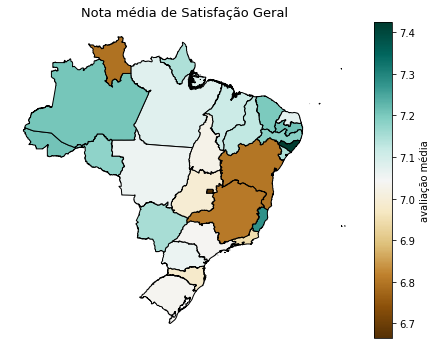

In [39]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.title("Nota média de Satisfação Geral", fontsize=13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
dados.plot(ax=ax, column='TOTAL', cmap='BrBG', legend=True, cax=cax, edgecolor="black",
           legend_kwds={'label': "avaliação média"})
ax.set_axis_off()
plt.show()

Este gráfico nos mostra a nota média de satisfação por estado entre os anos de 2015 e 2019, considerando todas as operadoras com operação no estado.

In [40]:
pt = df.pivot_table(values="sat_geral", index=['ESTADO'], columns='OPERADORA',aggfunc='mean', fill_value=0)
best = pt2.idxmax(axis='columns').to_frame('OPERADORA')
best.index.name = None


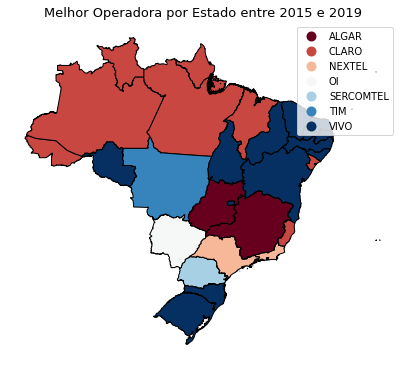

In [41]:
dados2 = mapa.merge(best, left_index=True, right_index=True)
fig, ax = plt.subplots(1, figsize=(7,7))
plt.title("Melhor Operadora por Estado entre 2015 e 2019", fontsize=13)
dados2.plot(ax=ax, column='OPERADORA', cmap='RdBu', legend=True, edgecolor="black", categorical=True)
ax.set_axis_off()
ax.set_aspect('equal')
plt.show()

O critério para a criação desse mapa é demonstrar a melhor nota de satisfação geral por estado, destacando a operadora que obteve a melhor nota em cada um.

In [42]:
pt3 = df.pivot_table(values='sat_geral', index='ESTADO', columns='ANO_BASE', aggfunc='mean', fill_value=0)
pt3.index.name = None
pt3.columns.name = None
cols = {col: str(col) for col in pt3.columns}
pt3.rename(columns=cols, inplace=True)

In [43]:
var = pt3.div(pt3['2015'], axis=0)
var = var[['2019']].copy()
var['2019'] = var['2019'].apply(lambda x: round(x-1,2))

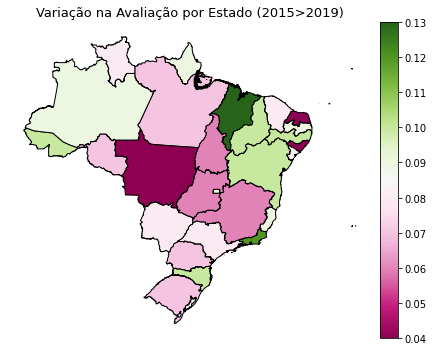

In [44]:
dados3 = mapa.merge(var, left_index=True, right_index=True)

fig, ax = plt.subplots(1, figsize=(7,7))
plt.title("Variação na Avaliação por Estado (2015>2019)", fontsize=13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

dados3.plot(ax=ax, column='2019',cmap='PiYG', legend=True, cax=cax, edgecolor="black")
ax.set_axis_off()
ax.set_aspect('equal')

plt.show()

Utilizando como ano base o ano de 2015, nesse gráfico podemos observar a variação da nota média de satisfação geral por estado em 2019. Estados mais rosados tiveram um aumento nessa nota menor do que os estados em verde.

In [45]:
pt4 = df.pivot_table(values='sat_geral', index='ESTADO', columns='ANO_BASE', aggfunc='mean', fill_value=0)
best = pt4.idxmax(axis='columns').to_frame('ANO_BASE')
best.index.name = None
dados4 = mapa.merge(best, left_index=True, right_index=True)

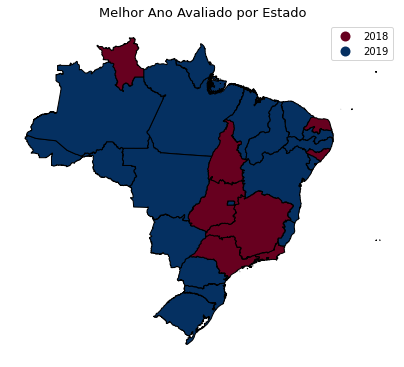

In [46]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.title("Melhor Ano Avaliado por Estado", fontsize=13)
dados4.plot(ax=ax, column='ANO_BASE', cmap='RdBu', legend=True, edgecolor="black", categorical=True)
ax.set_axis_off()
ax.set_aspect('equal')
plt.savefig('dados4.png', dpi=200, bbox_inches='tight')
plt.show()

O critério utilizado foi a nota média de satisfação geral por estado. Os estados indicados pela cor azul tiveram sua melhor média de satisfação geral em 2019, enquanto os indicados na cor vermelha tiveram uma melhor nota em 2018.

In [47]:
pt5 = df.pivot_table(values='sat_geral', index='ESTADO', columns='ANO_BASE', aggfunc='mean', fill_value=0)
worst = pt5.idxmin(axis='columns').to_frame('ANO_BASE')
worst.index.name = None
dados5 = mapa.merge(worst, left_index=True, right_index=True)

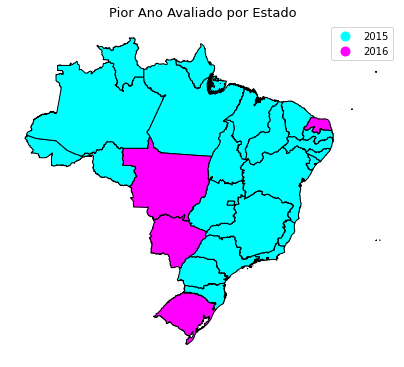

In [48]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.title("Pior Ano Avaliado por Estado", fontsize=13)
dados5.plot(ax=ax, column='ANO_BASE', cmap='cool', legend=True, edgecolor="black", categorical=True)
ax.set_axis_off()
ax.set_aspect('equal')
plt.savefig('dados5.png', dpi=200, bbox_inches='tight')
plt.show()

O critério utilizado foi a nota média de satisfação geral por estado. Os estados indicados pela cor azul tiveram sua pior média de satisfação geral em 2015, enquanto os indicados na cor roxa tiveram em 2016.

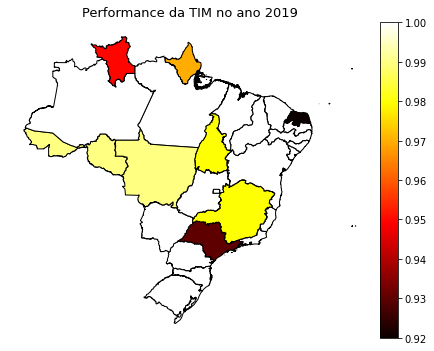

In [49]:
oper = 'TIM'
target = '2019'

mask = (df['OPERADORA']==oper) 
ops = df.loc[mask]
pt6 = ops.pivot_table(values= 'sat_geral', index='ESTADO', columns='ano', aggfunc='mean', fill_value=0)
vmax = pt6.max(axis='columns').values
var = pt6.div(vmax, axis=0)
var = var[[target]].copy()
var[target] = var[target].apply(lambda x: round(x,2))
dados6 = mapa.merge(var, left_index=True, right_index=True)

fig, ax = plt.subplots(1, figsize=(7,7))
plt.title(f"Performance da {oper} no ano {target}", fontsize=13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
dados6.plot(ax=ax, column=target, cmap='hot', legend=True, cax=cax, edgecolor="black")
ax.set_axis_off()
ax.set_aspect('equal')
plt.savefig('dados6.png', dpi=200, bbox_inches='tight')
plt.show()

No gráfico acima é possível visualizar que no ano de 2019 a Tim teve a melhor média de satisfação geral nos estados representados em branco. Quanto mais escura for a cor, pior foi a nota média de satisfação da Tim nesse ano, em comparação com outras notas médias ja obtidas por ela nos demais anos.

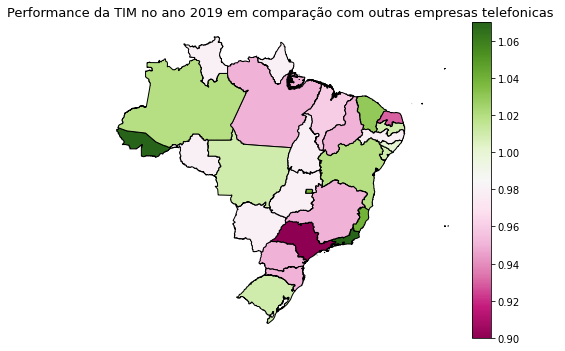

In [50]:
oper = 'TIM'
target = '2019'

mask = (df['OPERADORA']==oper)
ops = df.loc[mask]
pt7 = ops.pivot_table(values='sat_geral', index='ESTADO', columns='ano', aggfunc='mean', fill_value=0)
pt8 = df.pivot_table(values='sat_geral', index='ESTADO', columns='ano', aggfunc='mean', fill_value=0)
vmax = pt8.max(axis='columns').values
var = pt7.div(vmax, axis=0)
var = var[[target]].copy()
var[target] = var[target].apply(lambda x: round(x,2))
dados7 = mapa.merge(var, left_index=True, right_index=True)

fig, ax = plt.subplots(1, figsize=(7,7))
plt.title(f"Performance da {oper} no ano {target} em comparação com outras empresas telefonicas ", fontsize=13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

dados7.plot(ax=ax, column=target, cmap='PiYG', legend=True, cax=cax, edgecolor="black")
ax.set_axis_off()
ax.set_aspect('equal')
plt.savefig('dados7.png', dpi=200, bbox_inches='tight')
plt.show()

Esse gráfico nos compara a Tim com outras empresas telefônicas no ano de 2019, estados representados em verde foram onde a Tim teve uma nota média de satisfação maior do que outras empresas telefônicas, e estados representados por rosa foram onde a Tim teve sua média menor do que as outras empresas em questão. 

### 11. Conclusão

Após análise dos resultados das pesquisas que ocorreram nos anos de 2015 a 2018 com os clientes de telefonia móvel na modalidade pré pago observamos que embora o público mantenha um alto nível de reclamações junto as operadoras, a avaliação geral desses clientes é positiva e se mantém ao longo dos anos. 

Um ponto de destaque é a avaliação dos serviços consumidos de telefonia ser mais criteriosa conforme o aumento na renda do cliente, no entanto ainda continua muito perto da média, pois a maior parte dos clientes que consomem a modalidade pré-pago são pessoas com renda de até dois salários mínimos.

As regiões do país tem uma boa influência na amostra de participantes da pesquisa, muitos consumidores dessa modalidade residem nas regiões Norte e Nordeste e podemos relacionar este ponto com o público de renda de até dois salários mínimos, no Brasil essas regiões acabam tendo um PIB per capita mais baixo e consomem serviços que não pesam no orçamento.

Sobre os serviços avaliados, os que obtiverem a menor nota média estão relacionados a consumo de dados e sinal de internet, muitas operadores oferecem pacotes com benefícios de acesso ilimitado as redes sociais, muito utilizadas pelos usuários de smartphones, no entanto o sinal de internet nas modalidades 3G e 4G passa por instabilidade em muitas regiões do país, o que talvez influencie na baixa avaliação deste serviço.
